<a href="https://colab.research.google.com/github/fedhere/MLPNS2021/blob/main/HW4_clustering/clusteringGenes_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import pylab as pl
import sklearn as skl
from sklearn import cluster
import scipy as sp
from scipy import spatial
%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")
np.set_printoptions(precision=2)
rcParams['figure.figsize'] = 10, 10


Populating the interactive namespace from numpy and matplotlib


read the data in https://github.com/fedhere/DSPS/tree/master/HW10

In [ ]:
genes = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS/master/HW10/kidpackgenes.csv")

In [ ]:
genes.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
0,1,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,0.370241,0.390749,-0.103504,0.100439,-0.375930,0.277828,-0.130996,-0.009923,-0.399163,-0.127337,0.234942,0.628659,0.032232,-0.051522,0.322164,0.677058,0.626976,-0.075533,0.105881,0.121000,0.544208,0.126653,0.214285,0.426416,-0.385641,0.018007,0.407190,-0.175330,-0.033392,-0.056588,0.380069,0.247337,-0.160898,0.362272,0.190525,0.101010,1.280034,-0.137223,0.013790,0.284715,-0.080554,0.077708,0.071853,-0.225874,-0.148424,-0.104276,0.427028,0.331856,0.167732,-0.576949,0.007349,-0.002330,0.168953,-0.122312,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,2,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,0.394116,0.474481,-0.004962,0.828600,-0.458895,0.002399,-0.237577,-0.135808,-0.470168,0.088704,-0.039030,0.598749,0.216180,-0.086335,0.509942,0.741002,0.819442,-0.287630,0.253042,-0.122267,0.048518,0.164557,0.208869,0.351322,-0.096956,0.158479,0.566782,-0.171814,0.187912,0.103039,0.605204,-0.010693,0.145773,0.431635,0.408843,0.049612,0.873300,-0.445282,0.050207,0.102510,-0.438553,-0.000697,-0.232677,-0.684507,-0.138210,-0.265029,0.036734,0.474339,0.096666,-0.672424,-0.022295,0.094897,-0.123030,-0.382857,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,3,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,0.102853,0.078648,-0.175050,0.064488,-0.243920,-0.036435,-0.815732,-0.094098,-0.786828,-0.497140,-0.211386,0.249518,0.195911,-0.136115,-0.079168,0.461258,0.268629,0.075221,0.447445,-0.380212,-0.127944,-0.514944,0.204084,-0.132934,-0.717559,-0.723766,-0.009187,-0.026201,-0.428314,-0.243215,0.017108,0.199045,0.335860,-0.070557,0.296754,-0.147136,0.479280,-0.445308,0.173236,0.198668,-0.086679,-0.161494,0.043638,-0.115692,-0.020515,-0.035825,0.120870,0.474513,0.061214,-1.124604,0.085298,-0.160597,-0.223782,0.135259,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,4,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,0.531540,-0.109510,-0.178851,0.007126,-0.341273,-0.601923,-0.239953,0.307493,-0.264719,-0.105008,0.587365,0.220183,-0.380904,0.073614,0.082134,0.554048,0.300248,0.479317,0.110226,0.060817,0.080991,-0.165642,-0.327310,0.542784,-0.053313,-0.447296,0.701035,0.282916,0.272387,-0.124356,-0.091246,0.121123,-0.091694,0.174790,0.327808,1.024205,0.471022,0.087155,0.398634,-0.053726,0.354639,0.034264,0.684986,0.314253,0.181046,-0.273637,0.234412,0.066505,0.104653,-0.230860,0.074711,0.066029,0.276241,-0.331959,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,5,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,0.345860,0.282539,-0.077624,0.826049,-0.136295,-0.686548,-0.580715,0.037365,-0.106896,0.196168,0.201661,0.180436,0.052139,-0.001053,0.152552,0.365342,0.462115,-0.155553,0.239003,-0.231050,0.629987,0.020532,0.063029,-0.981387,-0.280845,-0.164185,0.846567,-0.399580,0.340091,0.044768,0.334025,0.032647,0.466371,-0.118516,0.665676,0.443797,0.474259,-0.349966,0.100411,-0.265844,-0.333114,0.914200,-0.088706,-0.457485,-0.046669,0.171069,0.127423,0.483766,0.607528,-1.412080,-0.281975,0.080899,0.855141,-0.487761,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477


# 1. explore the data. 

In [ ]:
genes.shape

(4224, 75)

In [ ]:
np.where(genes.isna())

(array([], dtype=int64), array([], dtype=int64))

There are no missing values. The data consistes of 4224 observations and 75 gene expressions. A quick google search shows that this is as expected: https://www.bioconductor.org/packages/devel/data/experiment/manuals/kidpack/man/kidpack.pdf

In [ ]:
scaledgenes = skl.preprocessing.scale(genes, axis=0)

In [ ]:
scaledgenes.mean(0).round(2), scaledgenes.std(0)

(array([-0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0.,  0., -0.,
         0., -0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0.,
        -0., -0., -0.,  0.,  0., -0.,  0., -0., -0., -0., -0.,  0., -0.,
         0., -0., -0.,  0., -0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0.,
         0.,  0.,  0., -0.,  0.,  0., -0.,  0., -0.,  0.,  0., -0.,  0.,
        -0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.]))

2.1 use TSNE to make a projection of the data on an optimal 2D plane using https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [ ]:
twodproj = skl.manifold.TSNE(n_components=2).fit_transform(scaledgenes)

In [ ]:
twodproj.shape

(4224, 2)

2.3 plot the TSNE projection


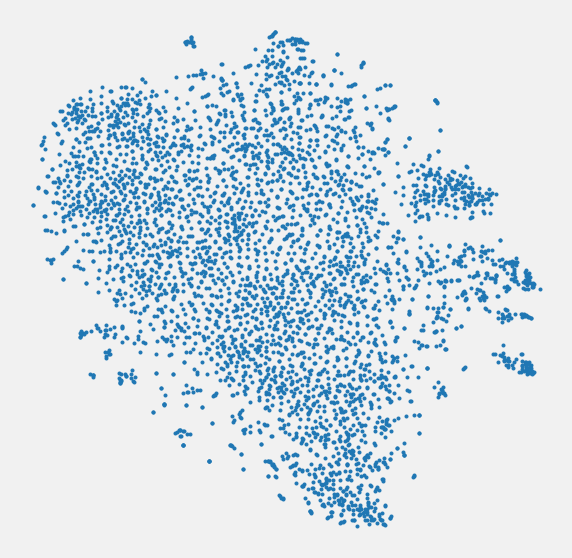

In [ ]:
pl.plot(twodproj[:,0], twodproj[:,1], '.')
pl.axis('off');

Figure 1: 2-dimensional projection of the "kidpack" genes which (from a trivial google search) contains expression measures for 4224 genes and 74 patients. This 2D projection is generates with the TSNE algorithm with default sklearn parameters corresponding to 30 nearest-neighbours and a Eucledian distance metric in the 72 dimensional parameter space. Note that TSNE plots are an exception to the rule that axis always need to be labelled! the TSNE projections are unitless and do not have any physical meaning. 

2.4 calculate a function that measures the intracluster variance (i did it in class)

In [ ]:
def calICVar(X, labels):
    """calculates the intracluster variance
    input 
    X:  an NxM-dimensional feature vecture for N observcations and M features
    labels: an N dimensional vector of labels
    """
    icvar = 0
    for n in np.unique(labels):
        #print (n, X[labels == n].std() ** 2)
        icvar += np.sum((X[labels == n] - X[labels == n].mean())**2)
        #X[labels == n].var() 
    print("intra cluster variance for {} clusters: {:.2f}".format(n, icvar))
    return icvar


# 3 K-Means clustering
3.1 cluster the data with K-Means using 1 to 10 clusters. Calculate and plot the intracluster variance as a function of number of clusters and look for an "elbow" in the value of the intracluster variance. What is the optimal number of clusters? discuss

intra cluster variance for 1 clusters: 256360.48
intra cluster variance for 2 clusters: 236862.37
intra cluster variance for 3 clusters: 237828.18
intra cluster variance for 4 clusters: 237937.37
intra cluster variance for 5 clusters: 232126.44
intra cluster variance for 6 clusters: 232440.76
intra cluster variance for 7 clusters: 230470.23
intra cluster variance for 8 clusters: 227174.49


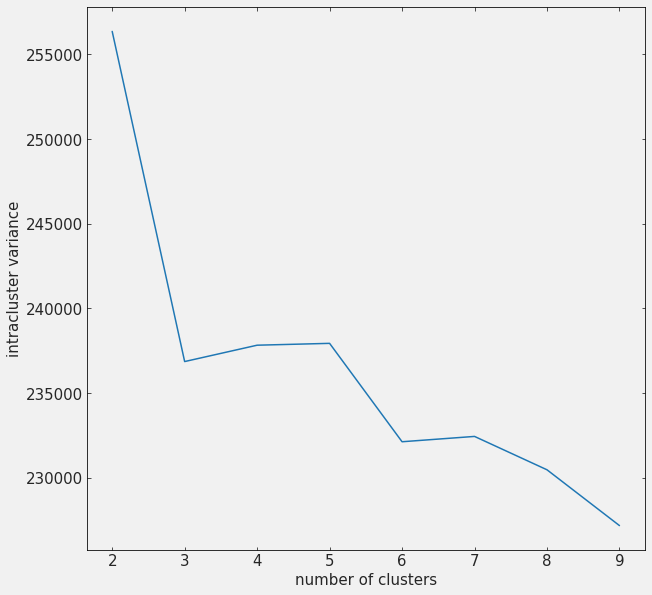

In [ ]:
np.random.seed(123)
tv = []
for i in range(2, 10):
    km = skl.cluster.k_means(scaledgenes, i)
    tv.append(calICVar(scaledgenes, km[1]))
    
pl.plot(range(2,10), tv)
pl.xlabel("number of clusters")
pl.ylabel("intracluster variance");



**Figure 2**: an "elbow" plot for k-means clustering of the kidpack genes dataset shown in Figure 1. The prominent bend in the plot of intracluster variance vs number of clusters at Nclusters = 3 suggests that this is the correct number of clusters for a k-means clustering analysis

3.2 plot the cluster on the 2D TSNE projection colorcoded by clusters

In [ ]:
Nclust = 3


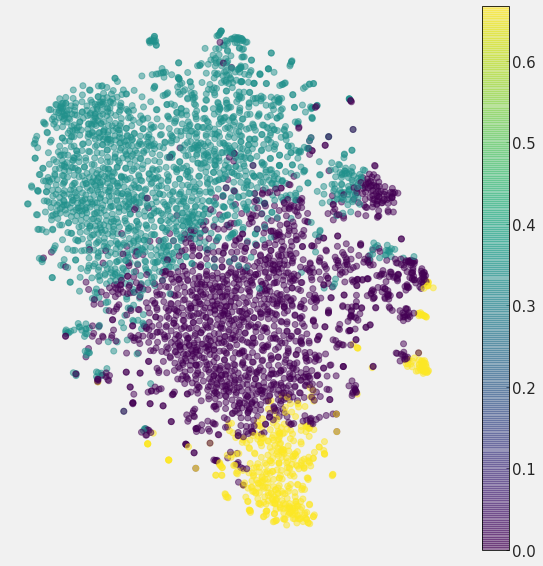

In [ ]:
#plots dont need to look exactly like mine
geneclustersKM = cluster.KMeans(n_clusters=Nclust).fit(scaledgenes)
pl.scatter(twodproj[:,0], twodproj[:,1], c=geneclustersKM.labels_/ geneclustersKM.n_clusters, alpha=0.5)
pl,axis('off')
pl.colorbar();


**Figure 3**: the clusters generated by K-means plotted in the 2D TSNE projection. The K-means clusters are adjacent in the TSNE 2D  projection, however they are not clearly separated indicating that There is no obvious pattern in common between the K-means model and the TSBE solution

# Choose to use DBSCAN or hierarchical clustering (EC also to the other method)

# 4a DBSCAN
4a.1 calculate and plot the distance matrix if you have not yet. Discuss: is there structure?


In [ ]:
dists = sp.spatial.distance.pdist(scaledgenes)


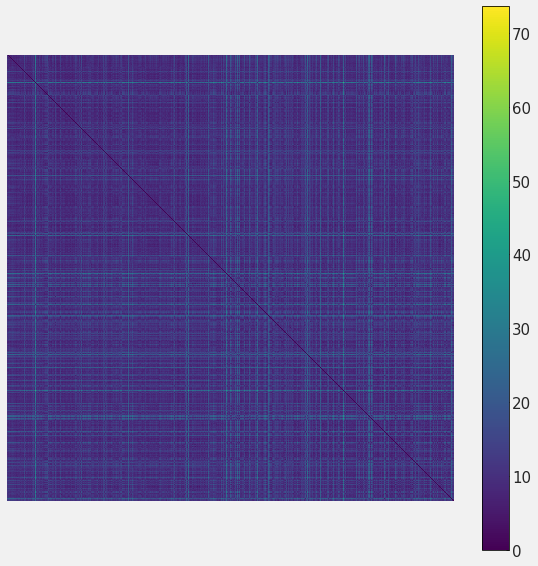

In [ ]:
pl.imshow(sp.spatial.distance.squareform(dists))
pl.axis('off')
pl.colorbar();


**Figure 4**: the distance matrix for a Euclidian distance between observations in the kidpack genes library. There is no obvious structure but the small dynamic range impairs the visual inspection. A log plot may give more insight.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


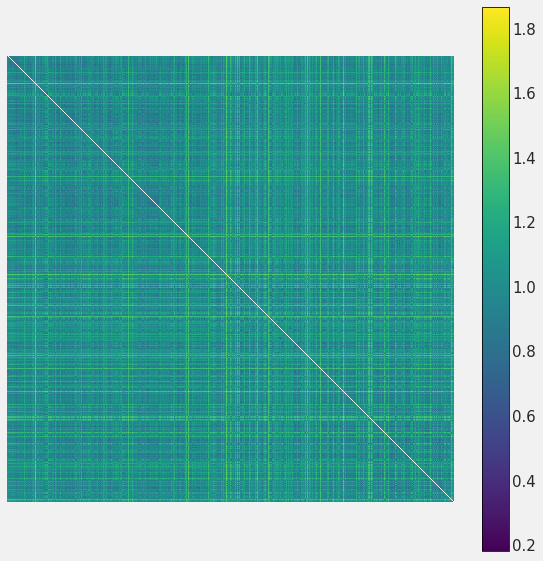

In [ ]:
pl.imshow(np.log10(sp.spatial.distance.squareform(dists)))
pl.axis('off')
pl.colorbar();


**Figure 5** : the distance matrix for a Euclidian distance between observations in the kidpack genes library in logarithmic color scale. No obvious structure is present.mm

4a.2 make a histogram of the pairwise distances. You should choose a value to initialize dbscan that is just below the mean

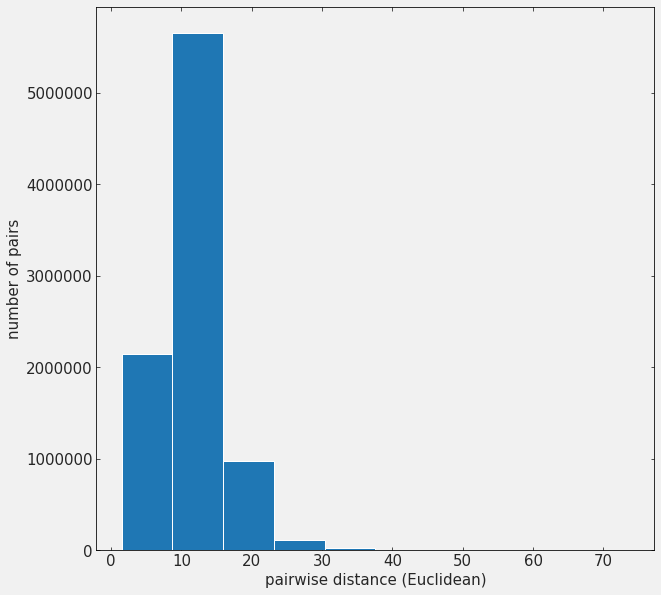

In [ ]:
pl.hist(dists);
pl.ylabel("number of pairs")
pl.xlabel("pairwise distance (Euclidean)");

**Figure 6**: Distribution of pairwise Eucledian distances between gene observations in the kidpack gene library. This histogram will be used to guess an appriopriate distance to define core clusters in the DBSCAN method

4a.3 initialize the dbscan eps value appropriately and fit a dbscan model to the data plot the 2D TSNE projection colorcoded as before. 



In [ ]:
dbsclusters = skl.cluster.DBSCAN(eps=6).fit(scaledgenes)

4a.4 How many clusters do you have, how many outliers? is that a significant number?

In [ ]:
print("number of clusters:", dbsclusters.labels_.max())

number of clusters: 2


In [ ]:
noutliers = (dbsclusters.labels_==-1).sum()
print("number of outliers:", noutliers)

number of outliers: 1266


In [ ]:
print("fraction of outliers: {:.2f}".format(noutliers * 1.0 / len(dbsclusters.labels_)))

fraction of outliers: 0.30


This hyperparameter selection leads to the identification of 30% of the points as "outliers". This fraction is too high and cannot be generally justified unless there is a strong contextual motivation for it. A better set of hyperparameters should be chosen

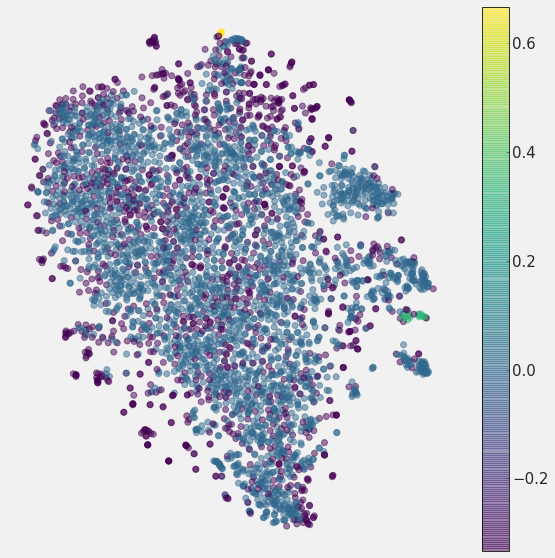

In [ ]:
geneclustersKM = cluster.KMeans(n_clusters=Nclust).fit(scaledgenes)
pl.scatter(twodproj[:,0], twodproj[:,1], c=dbsclusters.labels_/ (dbsclusters.labels_.max() + 1), alpha=0.5)
pl.axis('off')
pl.colorbar();

**Figure 7**: the clusters generated by DBSCAN plotted in the 2D TSNE projection. There is no obvious pattern in common between the DBSCAN model and the TSBE solution

# 4b Agglomerative clustering
 4b.1 cluster the data with the ward linkage


In [ ]:
geneclustersAg = skl.cluster.AgglomerativeClustering(linkage="ward", affinity='euclidean')
geneclustersAg.fit(scaledgenes)


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2,
                        pooling_func='deprecated')

4b.2 calculate the linkage and plot the dendrogram of the clusters  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
Z = linkage(scaledgenes, 'ward')


Text(0.5, 1.0, 'Agglomerative clustering linkage: Ward')

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


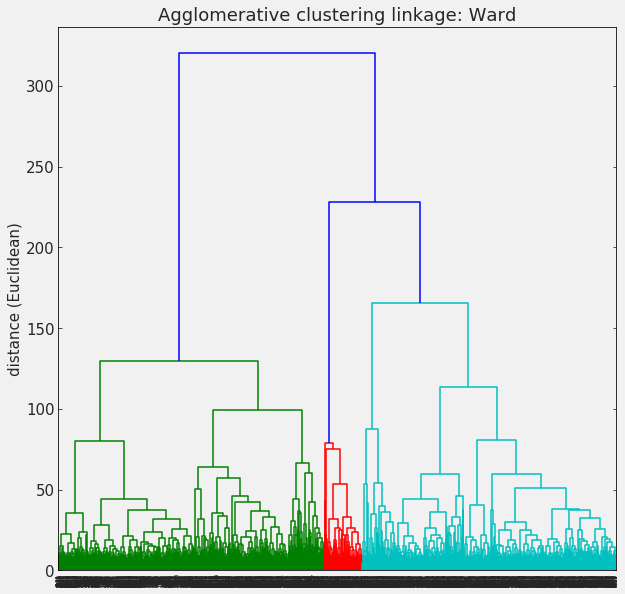

In [ ]:
dendrogram(Z);
pl.ylabel("distance (Euclidean)");
pl.title("Agglomerative clustering linkage: Ward")

**Figure 8**: Result of clustering with Agglomerative algorithm, Eucledian distance and Ward linkage: the core aggregation provides 3 clusters (somwehat consistently with the result of the K-Means algorithm)

4b.3 repeat with a different linkage and comment on differences

Text(0.5, 1.0, 'Agglomerative clustering linkage: Complete')

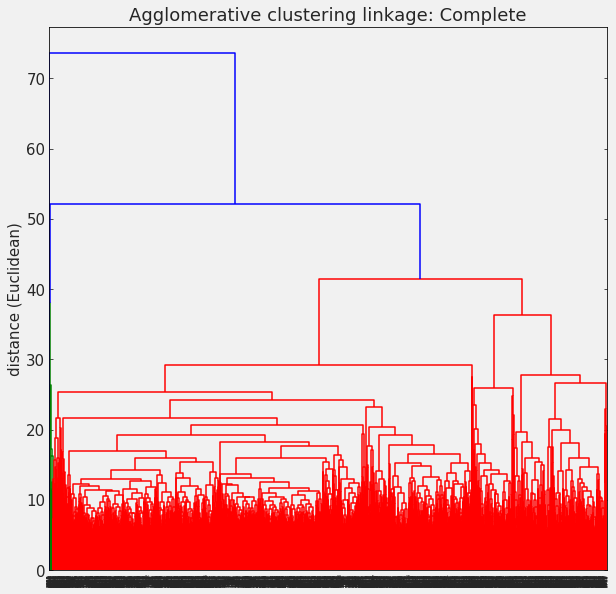

In [ ]:
Z = linkage(scaledgenes, 'complete')
dendrogram(Z);
pl.ylabel("distance (Euclidean)");
pl.title("Agglomerative clustering linkage: Complete");

**Figure 9**: Result of clustering with Agglomerative algorithm, Eucledian distance and "complete" linkage, i.e. distance between clusters are calculates as the maximum distance between the element of the clusters. Since the linkage scheme is radically different, as ecxpected, the result of the agglomrataion is visibly different.


4b.4 rerun agglomerative cluatering to get the "ideal" number of clusters as decided by k-means. plot the 2D TSNE projection colorcoded as before.

In [ ]:
geneclustersAg = skl.cluster.AgglomerativeClustering(n_clusters=Nclust,
                                                     linkage="ward", affinity='euclidean')
geneclustersAg.fit(scaledgenes)


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

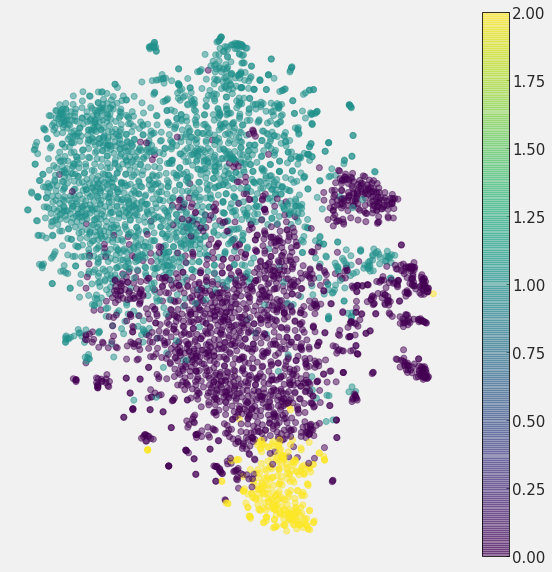

In [ ]:
pl.scatter(twodproj[:,0], twodproj[:,1], c=geneclustersAg.labels_, alpha=0.5)
pl.axis('off')
pl.colorbar();

**Figure 10**: the rsult of agglomerative clustering performed with the same distance metric as the K-means clustering, for the same number of sclusters (and with Ward linkage) is generally consistent with the result obtained with K-Means clustering


In [ ]:
geneclustersAg = skl.cluster.AgglomerativeClustering(n_clusters=Nclust,
                                                     linkage="complete", affinity='euclidean')
geneclustersAg.fit(scaledgenes)


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3,
                        pooling_func='deprecated')

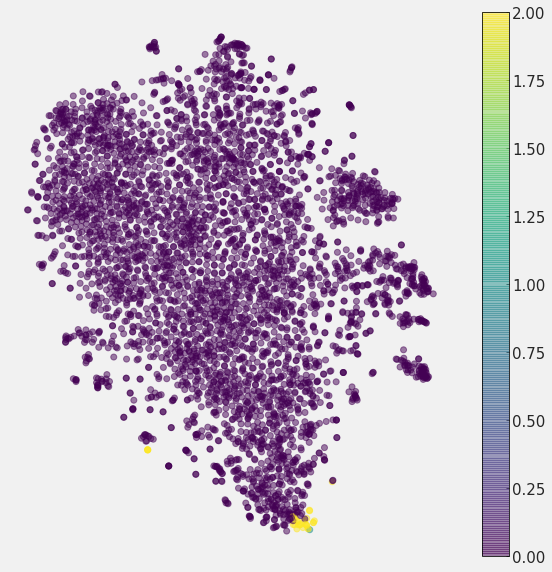

In [ ]:
pl.scatter(twodproj[:,0], twodproj[:,1], c=geneclustersAg.labels_, alpha=0.5)
pl.axis('off')
pl.colorbar();

**Figure 11**: the rsult of agglomerative clustering performed with the same distance metric as the K-means clustering, for the same number of sclusters *but with complete linkage* is not consistent with the result obtained with K-Means clustering: the clusters are much more unbalanced (note that this was not required)

# EC, 667: do the other method as well: agglomerative if you used DBSCAn, DBSCAN if you used agglomerative
